Imagem em tons de cinza salva como 'imagem_tons_de_cinza.jpg'
Imagem binarizada salva como 'imagem_preto_e_branco.jpg'


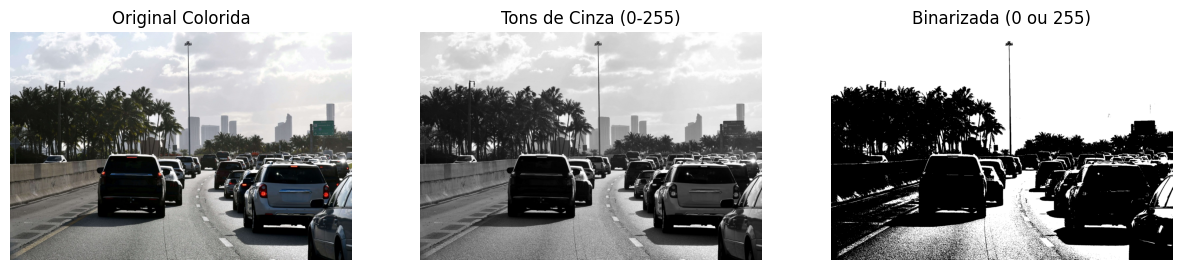

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def reduzir_dimensionalidade_imagem(caminho_imagem):
    """
    Carrega uma imagem colorida e cria duas versões:
    1. Uma imagem em tons de cinza (0-255).
    2. Uma imagem binarizada (0 ou 255).
    """
    
    try:
        img_colorida_pil = Image.open(caminho_imagem)
    except FileNotFoundError:
        print(f"Erro: O arquivo '{caminho_imagem}' não foi encontrado.")
        return
    
    img_array = np.array(img_colorida_pil)

    R = img_array[:, :, 0].astype(np.float64)
    G = img_array[:, :, 1].astype(np.float64)
    B = img_array[:, :, 2].astype(np.float64)

    # --- Parte 1: Conversão para Tons de Cinza (0-255) ---

    # Aplica a fórmula da média ponderada para calcular a intensidade do cinza
    img_cinza_array = (0.299 * R) + (0.587 * G) + (0.114 * B)

    # Converte o resultado de volta para um tipo de dado de imagem (inteiro de 8 bits sem sinal)
    img_cinza_array = img_cinza_array.astype(np.uint8)

    # Converte o array NumPy de volta para uma imagem da Pillow
    img_cinza_pil = Image.fromarray(img_cinza_array)
    img_cinza_pil.save("./output-images/imagem_tons_de_cinza.jpg")

    # --- Parte 2: Binarização da Imagem (0 ou 255) ---

    # Define o nosso valor de limiar (threshold)
    meio = int(255 /2) # 127

    img_binarizada_array = img_cinza_array.copy()

    img_binarizada_array[img_binarizada_array > meio] = 255
    img_binarizada_array[img_binarizada_array <= meio] = 0
    
    # Converte o array binarizado de volta para uma imagem da Pillow
    img_binarizada_pil = Image.fromarray(img_binarizada_array)
    img_binarizada_pil.save("./output-images/imagem_preto_e_branco.jpg")
    print("Imagem binarizada salva como 'imagem_preto_e_branco.jpg'")

    # --- Exibindo os resultados ---
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Original Colorida")
    plt.imshow(img_colorida_pil)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Tons de Cinza (0-255)")
    # Para exibir uma imagem 2D em tons de cinza, usamos o colormap 'gray'
    plt.imshow(img_cinza_pil, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Binarizada (0 ou 255)")
    plt.imshow(img_binarizada_pil, cmap='gray')
    plt.axis('off')

    plt.show()


# Chame a função com o nome da sua imagem
reduzir_dimensionalidade_imagem("transito_original.jpg")